In [1]:
#load libraries and scripts
.libPaths(c("/scratch/samkyy/gete-gbm/renv/library/R-4.0/x86_64-pc-linux-gnu","/tmp/RtmpJsRC8Z/renv-system-library", .libPaths()))
.libPaths()

resultsPath <- "~/scratch/gete-gbm/results"
getwd()

library(Seurat)
library(Matrix)
library(ggplot2)
library(cowplot)
library(genefilter)
library(tidyverse)
library(RCurl)
library(scales)
# library(SingleCellExperiment)
library(AnnotationHub)
library(ensembldb)
# Packages for figure layout formatting
library(grid)
library(gridExtra)

source("~/scratch/gete-gbm/bin/util.R")
source("~/scratch/gete-gbm/bin/util_go.R")
source("~/scratch/gete-gbm/bin/util_seurat.R")
source("~/scratch/gete-gbm/bin/util_viz.R")

[1] "/home/samkyy/R/x86_64-pc-linux-gnu-library/tcga-gbm-R4/renv/library/R-4.0/x86_64-pc-linux-gnu"
[2] "/home/samkyy/R/x86_64-pc-linux-gnu-library/4.0"                                               
[3] "/cvmfs/soft.computecanada.ca/easybuild/software/2020/avx2/Core/r/4.0.2/lib64/R/library"

[1] "/scratch/samkyy/gete-gbm/results/2022-09-19"

Attaching SeuratObject

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.1     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ readr::spec()   masks genefilter::spec()
✖ tidyr::unpack() masks Matrix::unpack()


Attaching package: ‘RCurl’


The following object is masked from ‘package:tidyr’:

    complete



Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor


Loading required package: BiocGenerics

Loading required package: para

In [46]:
gbmsc.ge <- readRDS("~/projects/def-ytanaka/common/te-gbm_proj/analysis/ge_gbmscIntUmap-subtypes.rds")
gbmsc.gte <- readRDS("~/projects/def-ytanaka/common/te-gbm_proj/analysis/gte_gbmscIntUmap-subtypes.rds") 

In [4]:
match(c('ASCL1', 'OLIG2', 'EGFR', 'GFAP', 'TGFB1', 'RELB'), rownames(gbmsc.ge))
match(c('ASCL1', 'OLIG2', 'EGFR', 'GFAP', 'TGFB1', 'RELB'), rownames(gbmsc.gte))

[1] 19267 29230 11757 24971 27530 27654

[1] 19121 29009 11669 24776 27319 27442

In [5]:
# With legends 

# Colours: same order as factored gbm_subtype levels. 
colours <- c("indianred2", "darkolivegreen3", "steelblue2", "pink1", "aquamarine2", "cyan3", "gray70")
retroCols <- c("indianred2", "darkolivegreen3", "steelblue2", "pink1", "cyan3") # missing MES-PN and NA

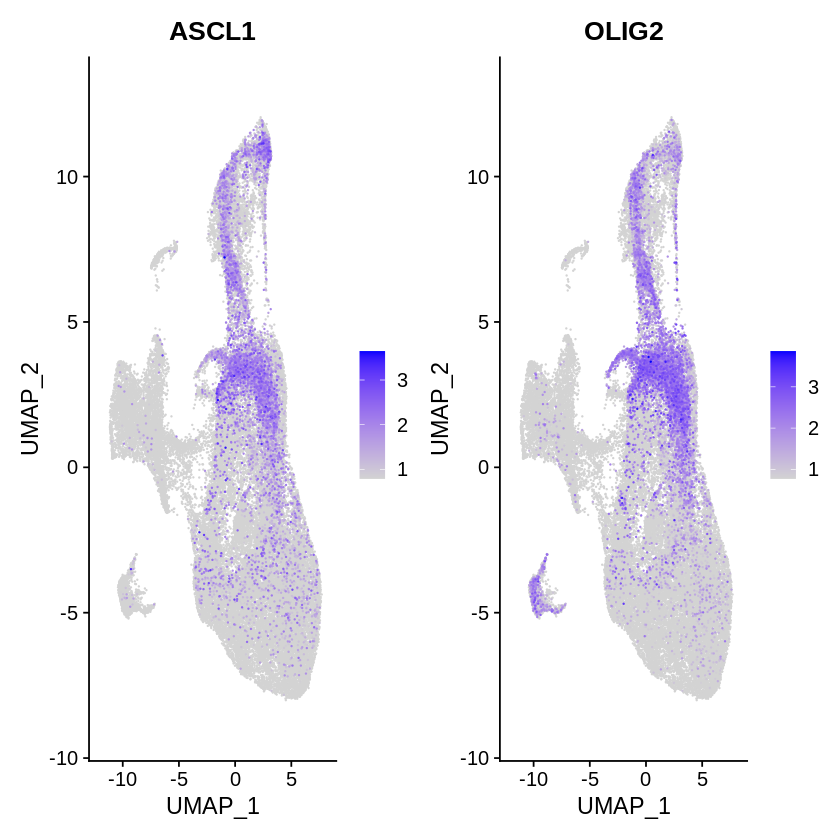

In [6]:
p1 <- FeaturePlot(gbmsc.ge, 
            reduction = "umap", 
            features = c('ASCL1', 'OLIG2'), 
            order = TRUE, #replaces sort.cell = TRUE
            min.cutoff = 'q10', 
            label = FALSE)
p1 

In [43]:
unique(gbmsc.ge$gbm_subtype)
gbmsc.ge$gbm_subtype <- factor(gbmsc.ge$gbm_subtype, 
                                  levels = c('Classical',
                                             'Mesenchymal',
                                             'Proneural',
                                             'Classical-Mesenchymal',
                                             'Mesenchymal-Proneural',
                                             'Classical-Proneural',
                                             'Other'),
                                  labels = c('CL',
                                             'MES',
                                             'PN',
                                             'CL-MES',
                                             'MES-PN',
                                             'CL-PN',
                                             'Other'))
levels(gbmsc.ge$gbm_subtype)

[1] "Classical-Mesenchymal" "Mesenchymal"           "Classical"            
[4] "Classical-Proneural"   "Other"                 "Proneural"            
[7] "Mesenchymal-Proneural"

[1] "CL"     "MES"    "PN"     "CL-MES" "MES-PN" "CL-PN"  "Other"

In [51]:
Idents(gbmsc.ge) <- "gbm_subtype"
Idents(gbmsc.ge) <- factor(Idents(gbmsc.ge), levels = c('Other',
                                                        'Classical-Mesenchymal',
                                                        'Mesenchymal-Proneural',
                                                        'Classical-Proneural',
                                                        'Mesenchymal',
                                                        'Classical',
                                                       'Proneural'),
                          labels = c('Other',
                                     'CL-MES',
                                     'MES-PN',
                                     'CL-PN',
                                     'MES',
                                     'CL',
                                     'PN')) 

In [53]:
resultsPath <- "~/scratch/gete-gbm/results"
getwd()
setwdToday()

[1] "/scratch/samkyy/gete-gbm/results/2022-09-19"

[1] "Current working directory: /scratch/samkyy/gete-gbm/results/2022-09-19"
[1] "New working directory: /scratch/samkyy/gete-gbm/results/2022-09-19"


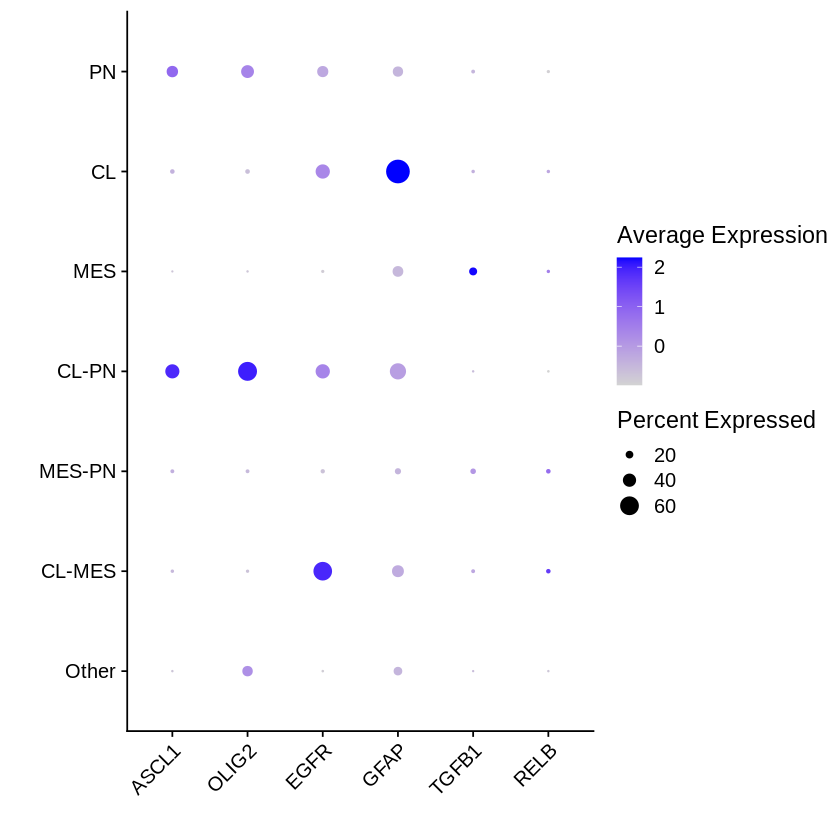

In [56]:
# subset(gbmsc.ge, subset = gbm_subtype != 'NA') %>% DotPlot(features = c('ASCL1', 'OLIG2', 'EGFR', 'GFAP', "TGFB1","RELB"), group.by = "gbm_subtype") + RotatedAxis()

ggsave("gbmsc_ge_subtypeMarkers_dotplot.tiff", units="in", width=5, height=3.5, dpi=300, compression = 'lzw')
DotPlot(gbmsc.ge, features = c('ASCL1', 'OLIG2', 'EGFR', 'GFAP', "TGFB1","RELB")) + RotatedAxis() + 
xlab('') + ylab('')

In [58]:
Idents(gbmsc.gte) <- "gbm_subtype"
Idents(gbmsc.gte) <- factor(Idents(gbmsc.gte), levels = c('Other',
                                                        'Classical-Mesenchymal',
                                                        'Mesenchymal-Proneural',
                                                        'Classical-Proneural',
                                                        'Mesenchymal',
                                                        'Classical',
                                                       'Proneural'),
                          labels = c('Other',
                                     'CL-MES',
                                     'MES-PN',
                                     'CL-PN',
                                     'MES',
                                     'CL',
                                     'PN')) 

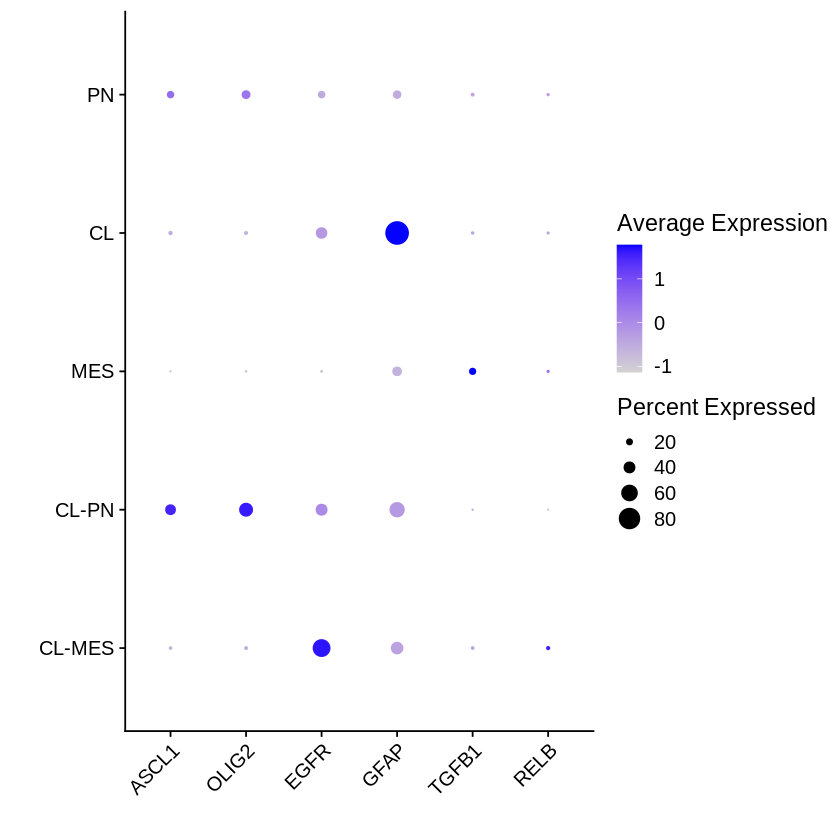

In [59]:
ggsave("gbmsc_gte_subtypeMarkers_dotplot.tiff", units="in", width=5, height=3.5, dpi=300, compression = 'lzw')
DotPlot(gbmsc.gte, features = c('ASCL1', 'OLIG2', 'EGFR', 'GFAP', "TGFB1","RELB")) + RotatedAxis() + 
xlab('') + ylab('')

In [17]:
sessionInfo()

R version 4.0.2 (2020-06-22)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /cvmfs/soft.computecanada.ca/easybuild/software/2020/Core/imkl/2020.1.217/compilers_and_libraries_2020.1.217/linux/mkl/lib/intel64_lin/libmkl_gf_lp64.so

locale:
 [1] LC_CTYPE=en_CA.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_CA.UTF-8        LC_COLLATE=en_CA.UTF-8    
 [5] LC_MONETARY=en_CA.UTF-8    LC_MESSAGES=en_CA.UTF-8   
 [7] LC_PAPER=en_CA.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_CA.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
 [1] grid      stats4    parallel  stats     graphics  grDevices utils    
 [8] datasets  methods   base     

other attached packages:
 [1] ggforce_0.3.3           RColorBrewer_1.1-2      GO.db_3.12.1           
 [4] org.Hs.eg.db_3.12.0     GOstats_2.56.0          graph_1.68.0           
 [7] Category_2.56.0     